### FASE 1 - EVALUACIÓN FINAL - MÓDULO 3 - IRINA OSTOJIC

#### _IMPORTS_

In [ ]:
# Importamos las librerías que vamos a utilizar

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Técnicas avanzadas para gestión de nulos
# ------------------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

## FASE 1: EXPLORACIÓN Y LIMPIEZA

### 1. _EXPLORACIÓN INICIAL DE LOS DATOS: EDA_
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente. 

In [193]:
# Función para aplicar un EDA básico
def eda_basico(df):
    print("========== RESUMEN GENERAL ==========")
    print("📐 Dimensiones:")
    print(F"Este DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas." , "\n")
    print()
    print()
    print('-----------------------------------------------------')
    print("🧠 Información general:")
    display(df.info())
    print()
    print()
    print('-----------------------------------------------------')
    print("📊 Tipos de datos por columna:")
    print(df.dtypes, "\n")
    print()
    print()
    print('-----------------------------------------------------')
    
    print("\n========== DESCRIBES ==========")
    print("📉 Descripción de columnas numéricas:")
    display(df.describe().T)
    print()
    print()
    print('-----------------------------------------------------')

    print("🔤 Descripción de columnas categóricas:")
    try:
        display(df.describe(include=['O']))
    except ValueError:
        print("No se existen columnas categóricas en este DataFrame.")
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== MUESTRAS ==========")
    print("🔍 Primeras filas del DataFrame:")
    display(df.head())
    print()
    print()
    print("🔍 Últimas filas del DataFrame:")
    display(df.tail(5))
    print()
    print()
    print("🔍 Cinco filas aleatorias del DataFrame:")
    display(df.sample(5))
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== VALUE COUNTS (por columna categórica) ==========")
    col_categoricas =  df.select_dtypes(include=["object", "category"]).columns.tolist()

    if col_categoricas:
        for c in col_categoricas:
            print(f"\n--- {c} ---")
            print(df[c].value_counts)
    else:
        print("No se puede realizar la función .value_counts ya que no existen columnas categóricas.")
    print('-----------------------------------------------------')

    print("\n========== NULOS ==========")
    print("🚫 Valores nulos por columna:")
    if df.isnull().sum().any():
        print("Estas son las columnas en las que hay valores nulos:")
        print(display(df.isnull().sum()))
    else:
        print("No hay valores nulos en este DataFrame.")
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== DUPLICADOS ==========")
    print("📎 Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Hay {dup_count} filas duplicadas.")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")
    print('-----------------------------------------------------')

    print("\n========== HISTOGRAMAS NUMÉRICOS ==========")
    df.hist(bins=20, figsize=(25,25))
    plt.show()
    print('-----------------------------------------------------')

    print("\n========== GRÁFICAS DE BARRAS CATEGÓRICAS==========")
    if col_categoricas:
        for c in col_categoricas:
            plt.figure(figsize=(10, 10))
            sns.countplot(x=c, data=df, palette='Set2')
            plt.xticks(rotation=90)
            plt.xlabel(f"Countplot de {c}")
            plt.show()
    else:
        print("No existen columnas categóricas a las que realizar gráficas de barras.")

In [194]:
# Lectura del primer CSV
df_activity = pd.read_csv("Customer Flight Activity.csv")

========== RESUMEN GENERAL ==========
📐 Dimensiones:
Este DataFrame tiene 405624 filas y 10 columnas. 



-----------------------------------------------------
🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64 

None



-----------------------------------------------------
📊 Tipos de datos por columna:
Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object 



-----------------------------------------------------

========== DESCRIBES ==========
📉 Descripción de columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0




-----------------------------------------------------
🔤 Descripción de columnas categóricas:
No se existen columnas categóricas en este DataFrame.


-----------------------------------------------------

========== MUESTRAS ==========
🔍 Primeras filas del DataFrame:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0




🔍 Últimas filas del DataFrame:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0




🔍 Cinco filas aleatorias del DataFrame:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
108812,494213,2017,7,9,0,9,882,88.0,0,0
320282,955292,2018,7,17,7,24,3768,376.0,0,0
347648,612294,2018,9,0,0,0,0,0.0,0,0
120473,215260,2017,8,0,0,0,0,0.0,0,0
314235,632556,2018,7,0,0,0,0,0.0,0,0




-----------------------------------------------------

========== VALUE COUNTS (por columna categórica) ==========
No se puede realizar la función .value_counts ya que no existen columnas categóricas.
-----------------------------------------------------

========== NULOS ==========
🚫 Valores nulos por columna:
No hay valores nulos en este DataFrame.


-----------------------------------------------------

========== DUPLICADOS ==========
📎 Filas duplicadas:
Hay 1864 filas duplicadas.
Ejemplo de duplicados:
     Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
42           101902  2017      1               0                        0   
227          112142  2017      1               0                        0   
478          126100  2017      1               0                        0   
567          130331  2017      1               0                        0   
660          135421  2017      1               0                        0   

     Total Flights  Di

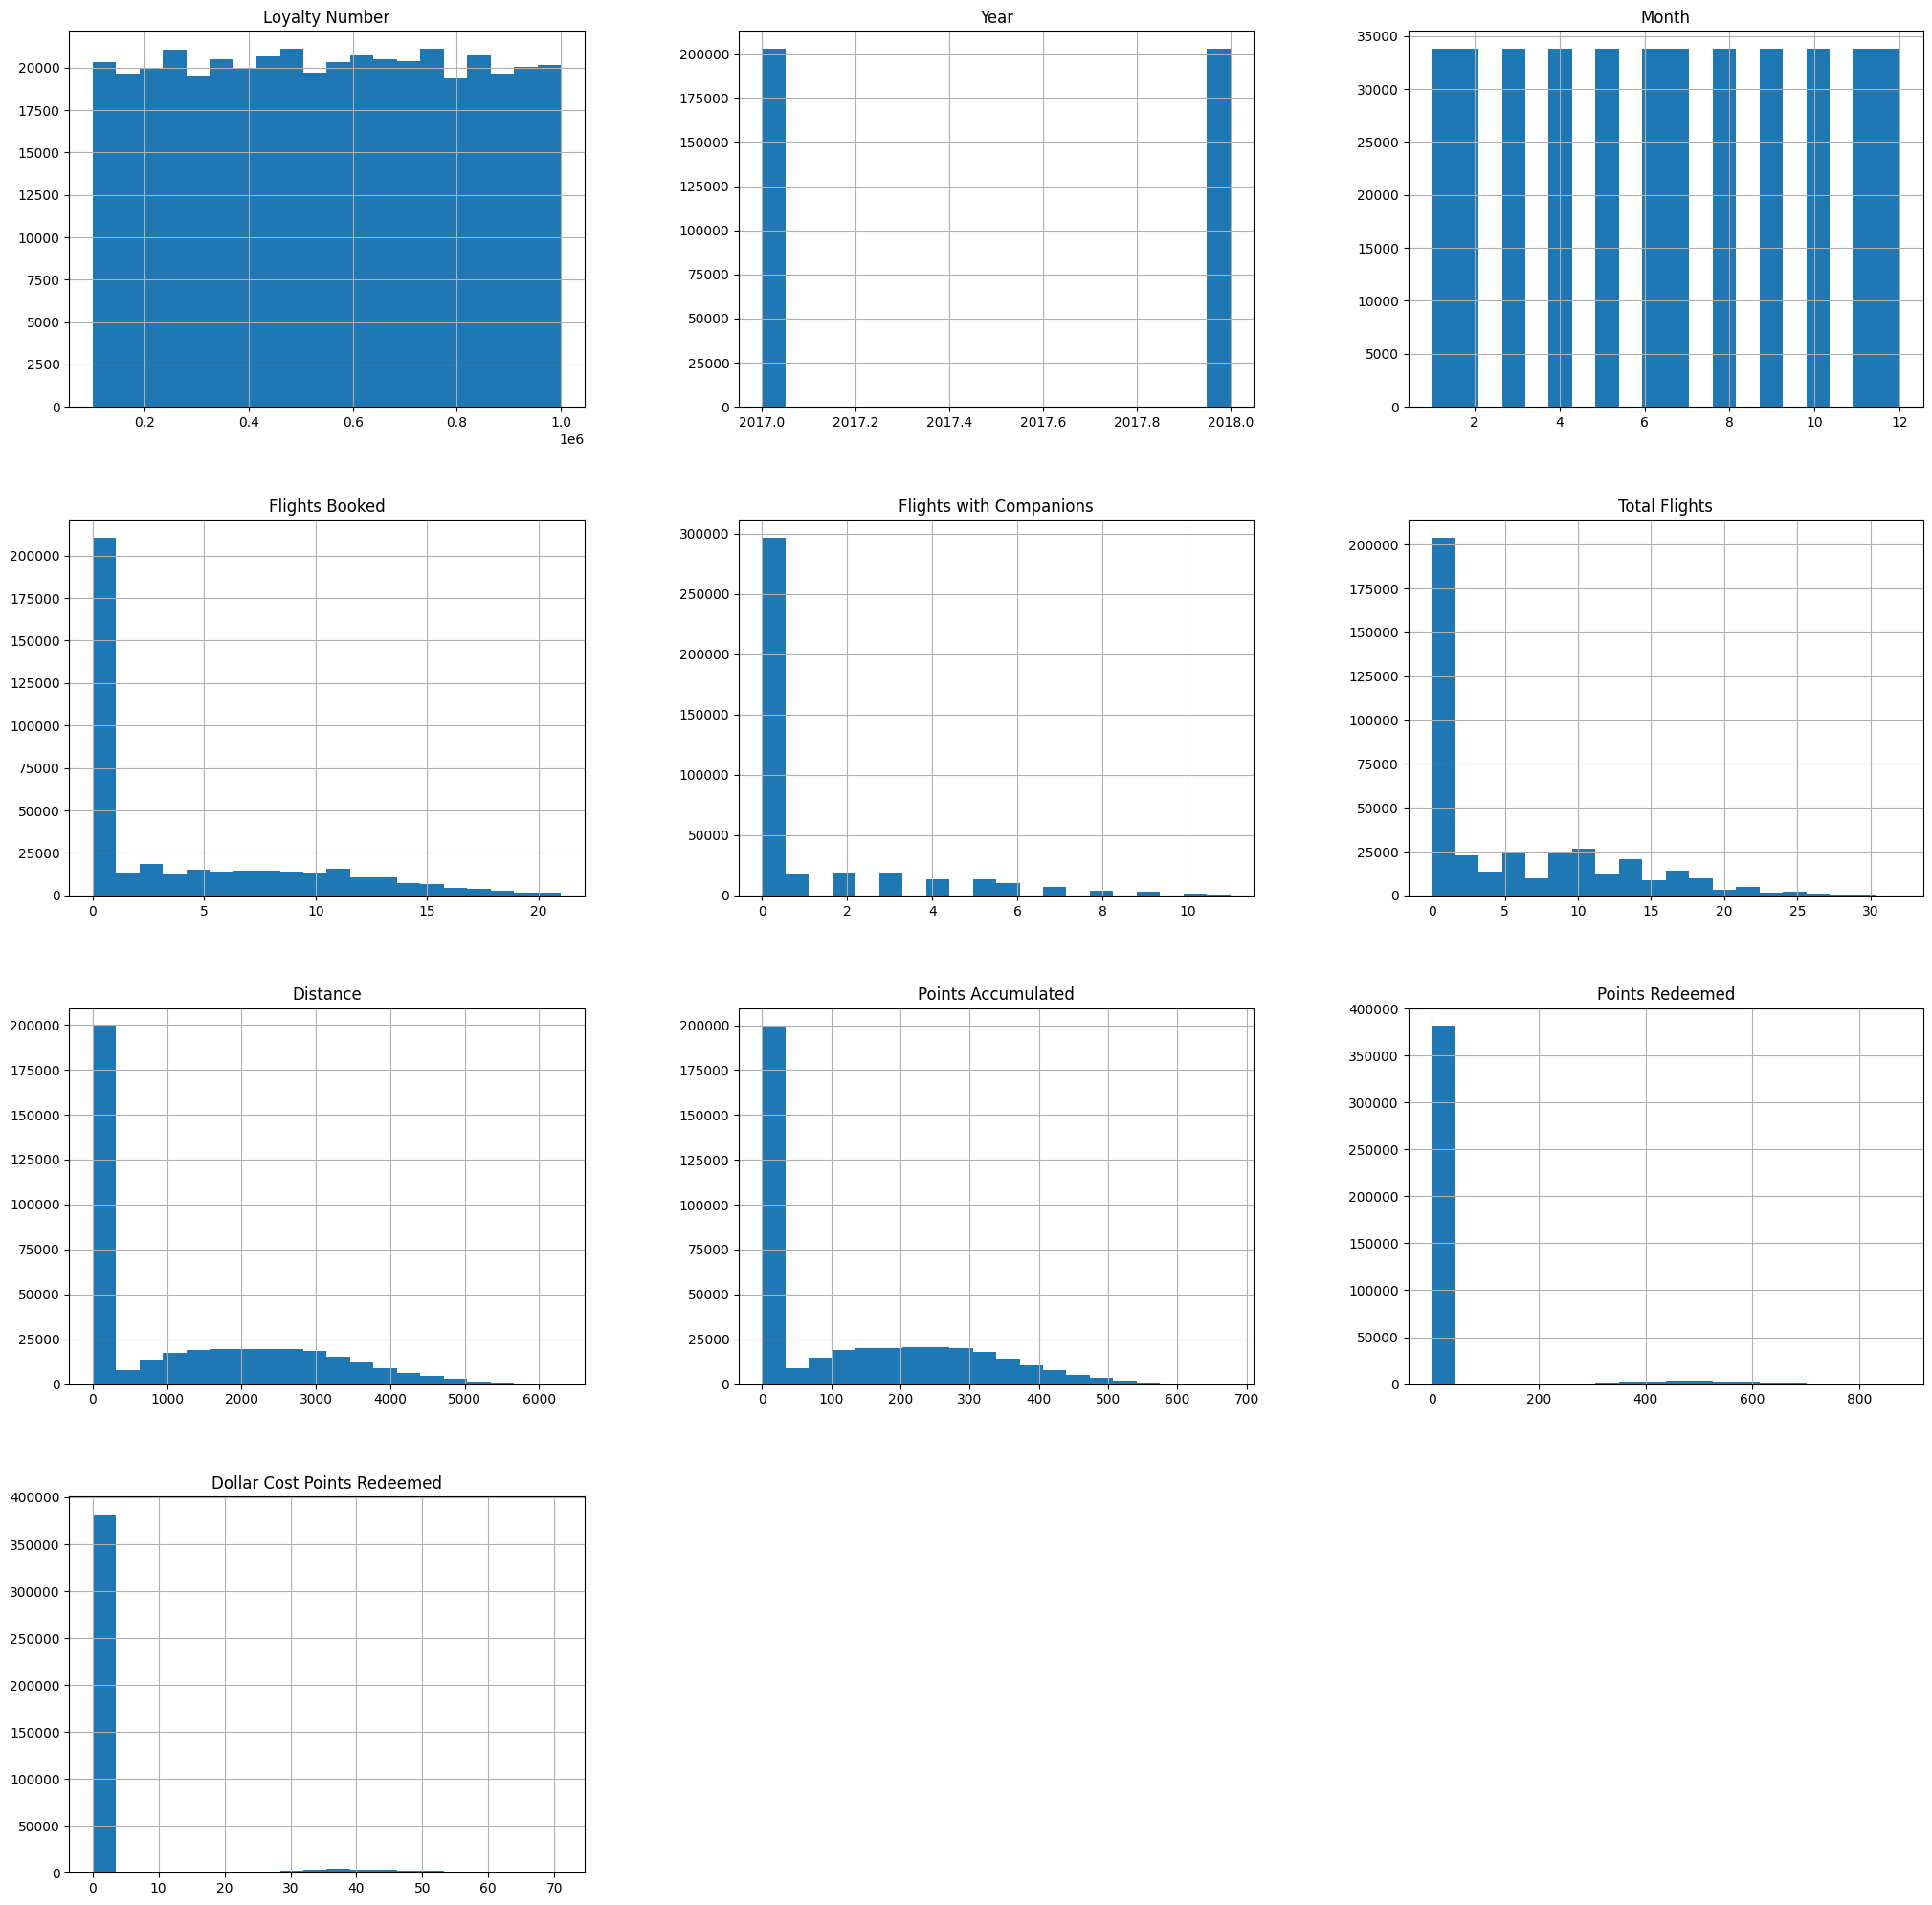

-----------------------------------------------------

========== GRÁFICAS DE BARRAS CATEGÓRICAS==========
No existen columnas categóricas a las que realizar gráficas de barras.


In [195]:
# Aplicamos nuestra función a nuestro primer DataFrame
eda_basico(df_activity)

Análisis:
- En `Year` solo hay dos años: 2017 y 2018. 
- En `Month` vamos del 1 a 12, por lo que confirmamos que los valores son correctos.
- En `Flights Booked` tenemos una media de 4.1, pero con desviación (std) alta (5.2), por lo que podemos intuir que hay clientes muy activos y otros que no vuelan tanto.
- En `Flights with Companions` su media es baja (1.03) y su mediana es 0, por lo que la mayoría de la gente viaja sola.
- En `Total Flights` tenemos una media de 5.14, mientras que la mediana es 1. Intuimos que hay muchos clientes con pocos vuelos, pero sin embargo, hay algunos con muchos (por ej. hay un cliente que ha hecho el valor máximo con 32 vuelos).
- En `Distance` la media de  kilómetros es de 1208kms, pero su desviación es alta (1433kms). Intuimos que hay vuelos cortos y otros muy largos, ya que el primer cuartil (25%) es 0, el segundo (50%) es 488kms (entendemos que un vuelo de menos kms. no tiene sentido) y el tercer cuartil (75%) es de 2336kms, siendo el valor máximo de 6293kms. Su mediana es de 488kms, por lo que la mayoría son trayectos moderados.
- En `Points Accumulated` la media es de 123 puntos, pero la mediana es de 50, por lo que hay muchos clientes acumulan pocos puntos. Mientras, el máximo es de 676, por lo que hay usuarios muy activos, con vuelos largos, o ambas.
- Nuestro DataFrame no tiene valores nulos, pero sin embargo, hay columnas en las que tenemos muchos 0.
- Observamos que existen valores a los que podríamos cambiarle el tipo de dato. Por ejemplo: 
    - `Points Redeemed`: al tratarse de un sistema de puntos, se puede intuir que es mejor que esté en tipo integer. Sin embargo, en el describe observamos que `Points Accumulated`tiene como valor máximo un 676.5, dejando ver que puede ser un sistema de puntos con decimales. Pasamos entonces esta columna a tipo decimal para unificarlas.
    - `Dollar Cost Points Redeemed`: al tratarse de valores monetarios, tendría más sentido que estuviese en tipo float.
- Codos nuestros histogramas presentan una forma asimétrica (a excepción por ejemplo de años, meses...), por lo que en el caso de imputar algún nulo con media o mediana, deberemos hacerlo con mediana. Para ello, más adelante lo trataremos en una función en proporción al porcentaje de nulos que obtengamos.

In [196]:
# Lectura del segundo CSV
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

========== RESUMEN GENERAL ==========
📐 Dimensiones:
Este DataFrame tiene 16737 filas y 16 columnas. 



-----------------------------------------------------
🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year   

None



-----------------------------------------------------
📊 Tipos de datos por columna:
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object 



-----------------------------------------------------

========== DESCRIBES ==========
📉 Descripción de columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00




-----------------------------------------------------
🔤 Descripción de columnas categóricas:


,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766




-----------------------------------------------------

========== MUESTRAS ==========
🔍 Primeras filas del DataFrame:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN




🔍 Últimas filas del DataFrame:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0




🔍 Cinco filas aleatorias del DataFrame:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16542,423313,Canada,Ontario,Trenton,K8V 4B2,Male,Master,81765.0,Single,Star,25464.82,Standard,2015,8,2016.0,4.0
14746,505962,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,79367.0,Married,Star,7739.55,Standard,2016,1,NaN,NaN
13848,202293,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,97976.0,Divorced,Star,5633.53,Standard,2014,2,NaN,NaN
4234,276204,Canada,Alberta,Banff,T4V 1D4,Male,Bachelor,68546.0,Single,Nova,2771.05,Standard,2017,8,NaN,NaN
9991,342569,Canada,Ontario,Thunder Bay,K8T 5M5,Female,College,NaN,Single,Star,2230.28,Standard,2016,7,NaN,NaN




-----------------------------------------------------

========== VALUE COUNTS (por columna categórica) ==========

--- Country ---
<bound method IndexOpsMixin.value_counts of 0        Canada
1        Canada
2        Canada
3        Canada
4        Canada
          ...  
16732    Canada
16733    Canada
16734    Canada
16735    Canada
16736    Canada
Name: Country, Length: 16737, dtype: object>

--- Province ---
<bound method IndexOpsMixin.value_counts of 0                 Ontario
1                 Alberta
2        British Columbia
3                 Ontario
4                  Quebec
               ...       
16732    British Columbia
16733        Saskatchewan
16734    British Columbia
16735               Yukon
16736            Manitoba
Name: Province, Length: 16737, dtype: object>

--- City ---
<bound method IndexOpsMixin.value_counts of 0           Toronto
1          Edmonton
2         Vancouver
3           Toronto
4              Hull
            ...    
16732     Vancouver
16733    

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

None


-----------------------------------------------------

========== DUPLICADOS ==========
📎 Filas duplicadas:
Hay 0 filas duplicadas.
No hay filas duplicadas.

-----------------------------------------------------

========== HISTOGRAMAS NUMÉRICOS ==========


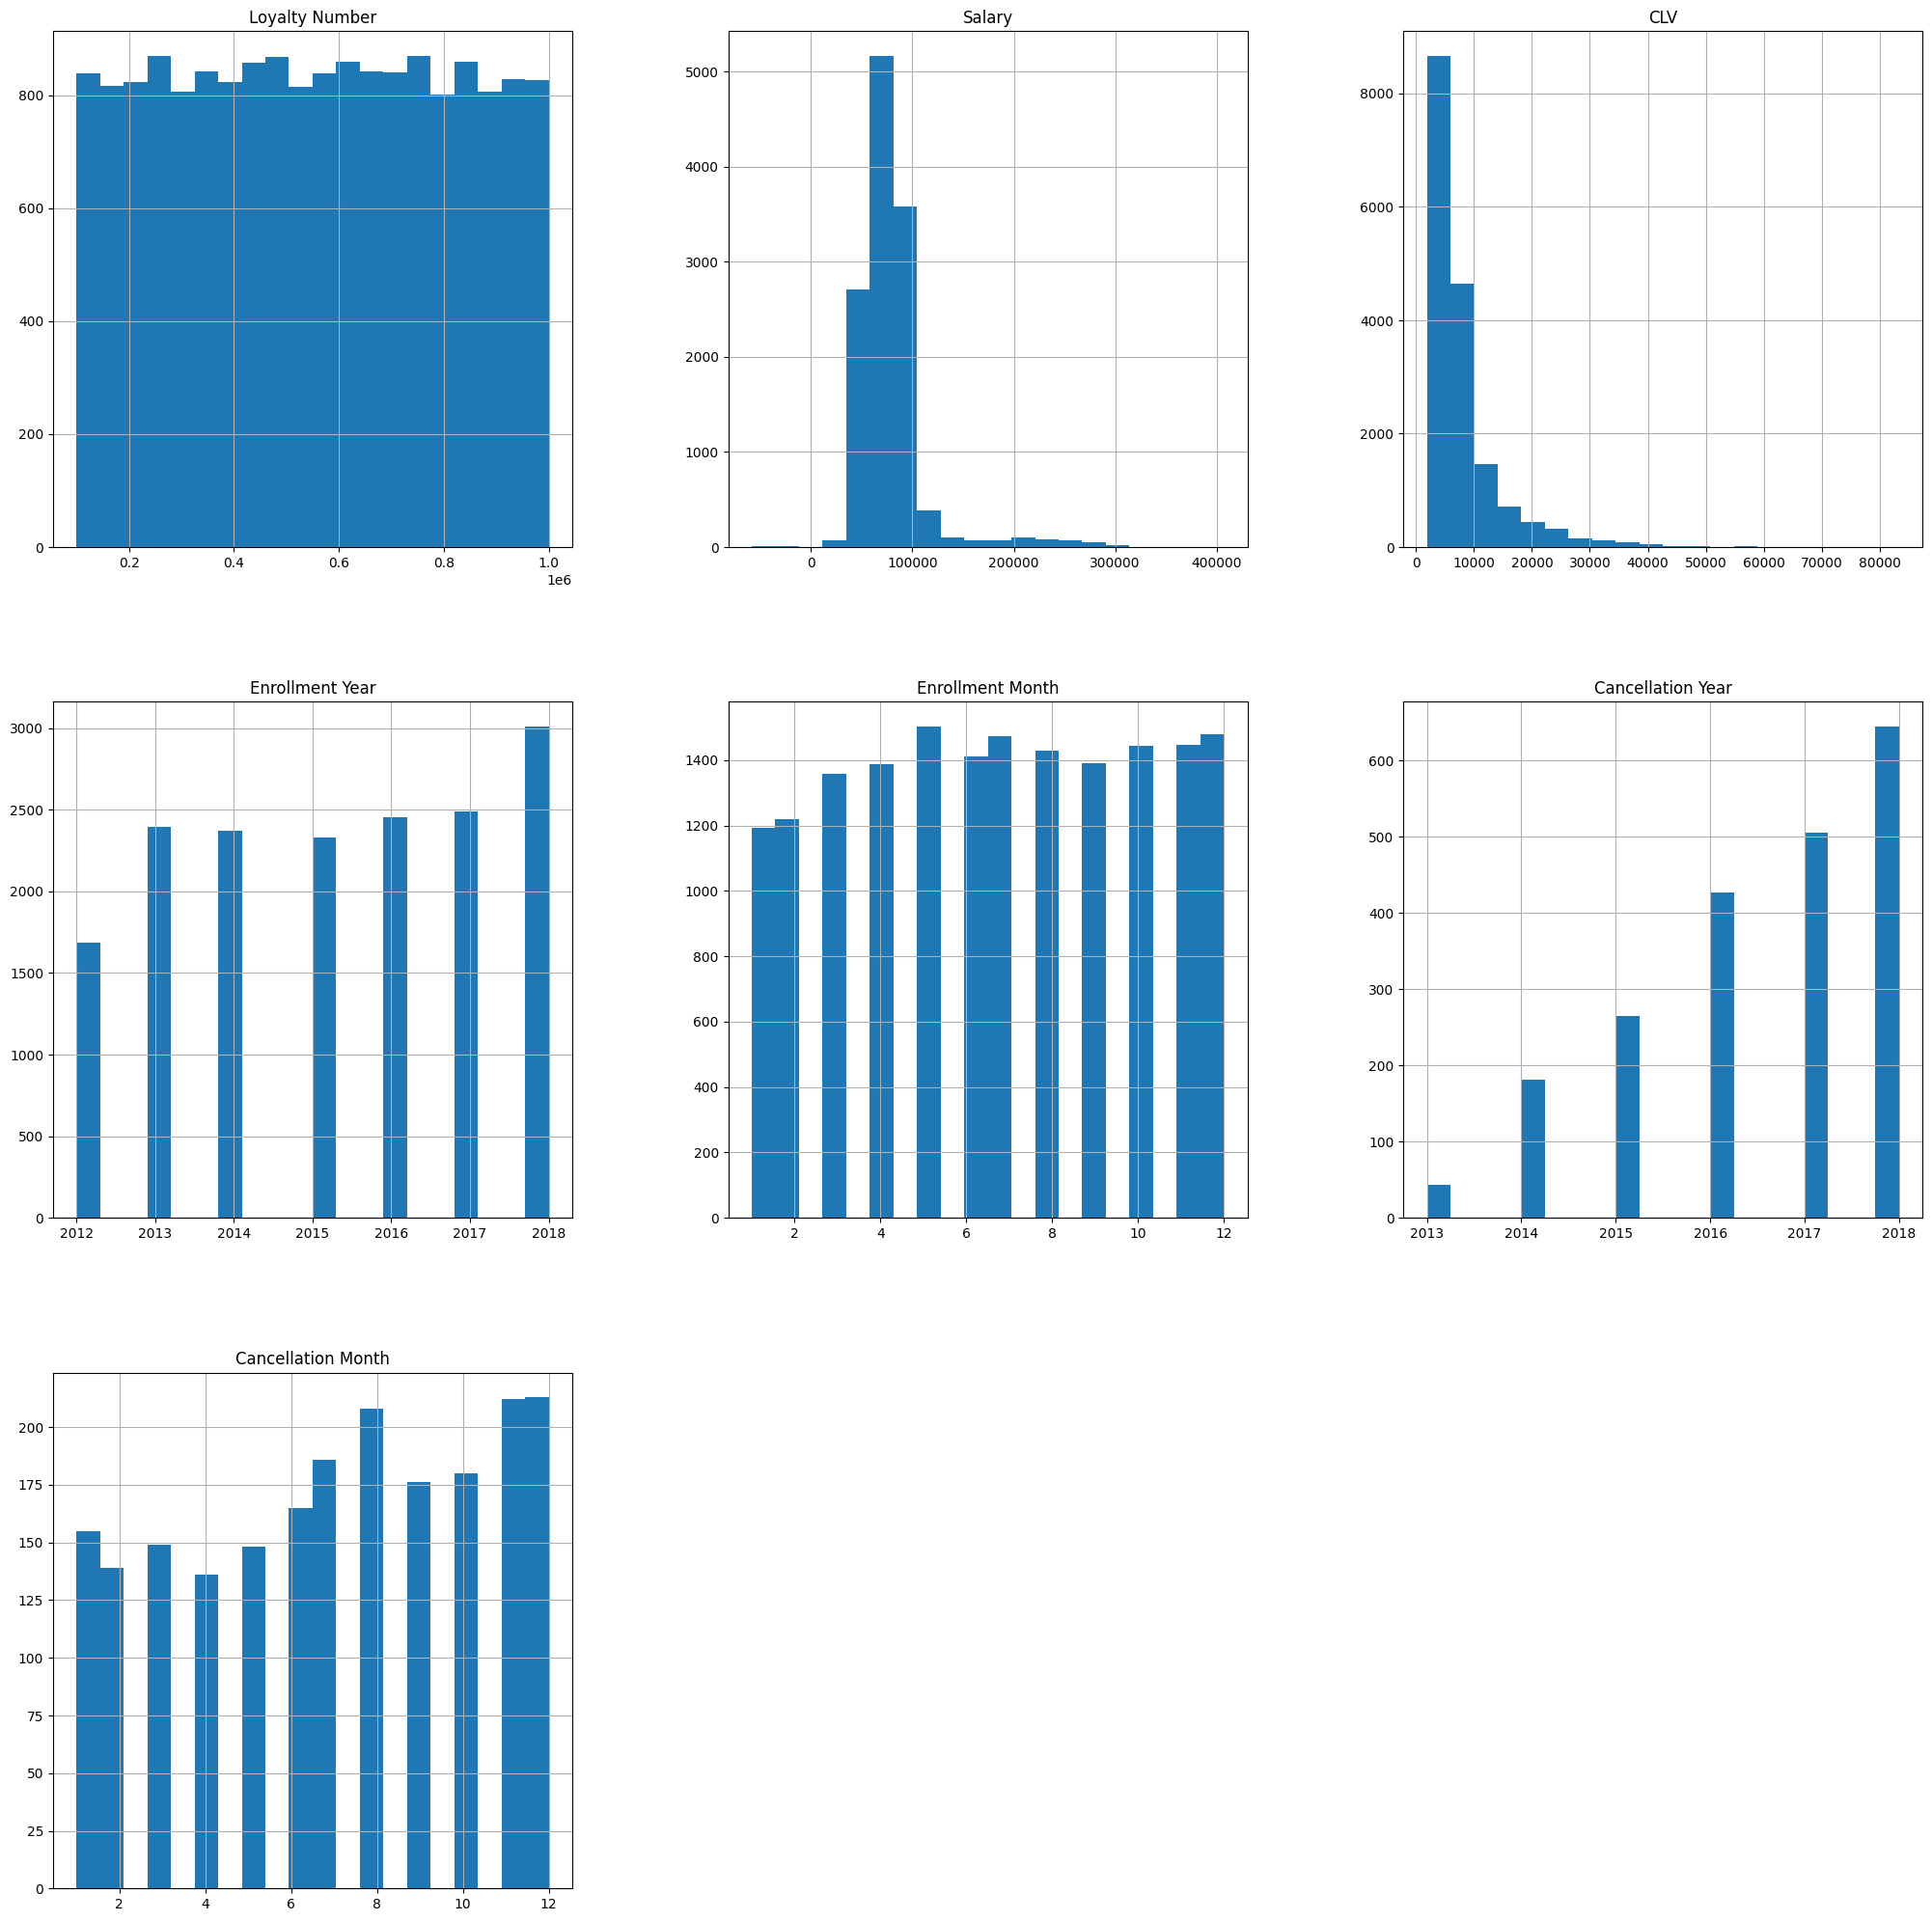

-----------------------------------------------------

========== GRÁFICAS DE BARRAS CATEGÓRICAS==========


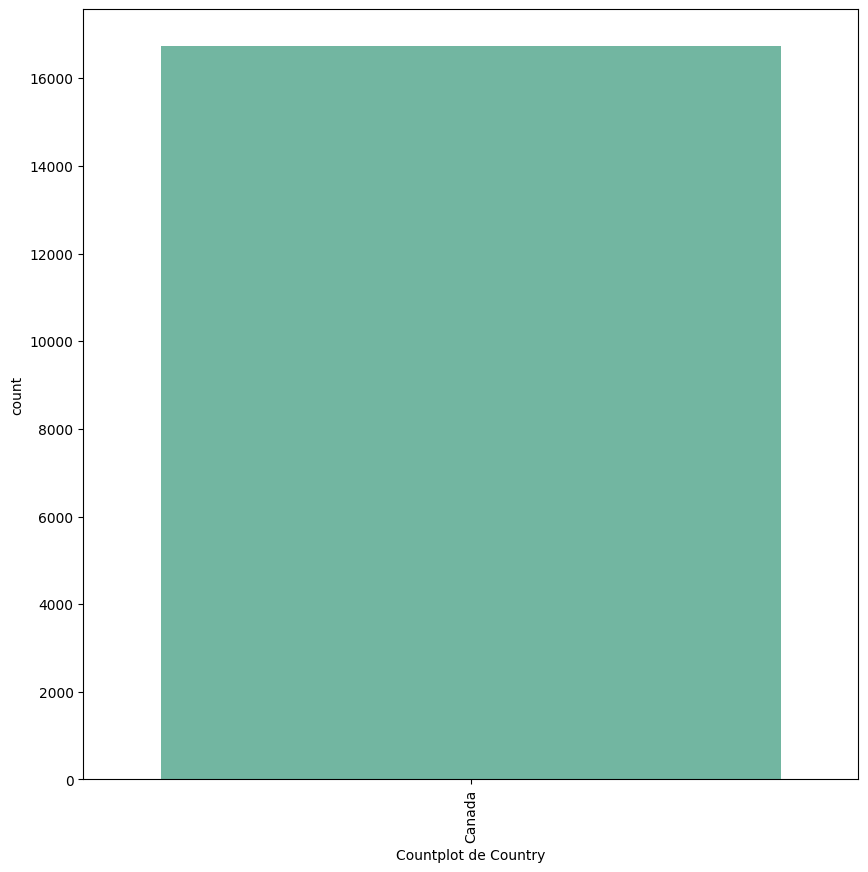

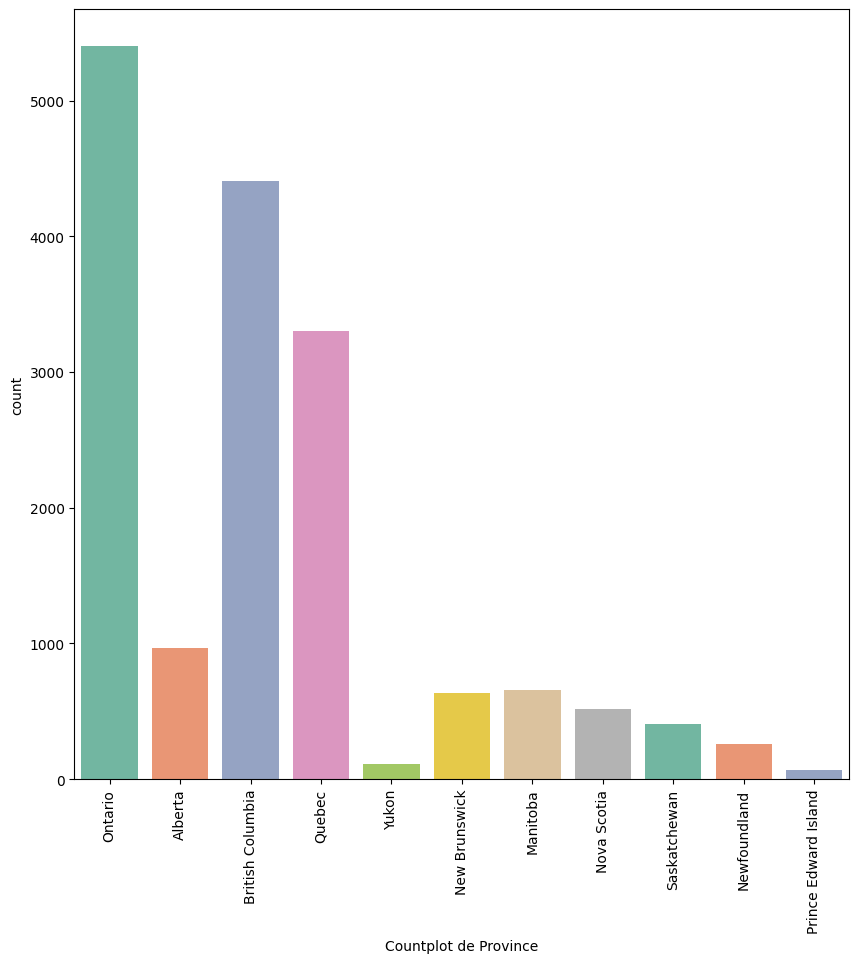

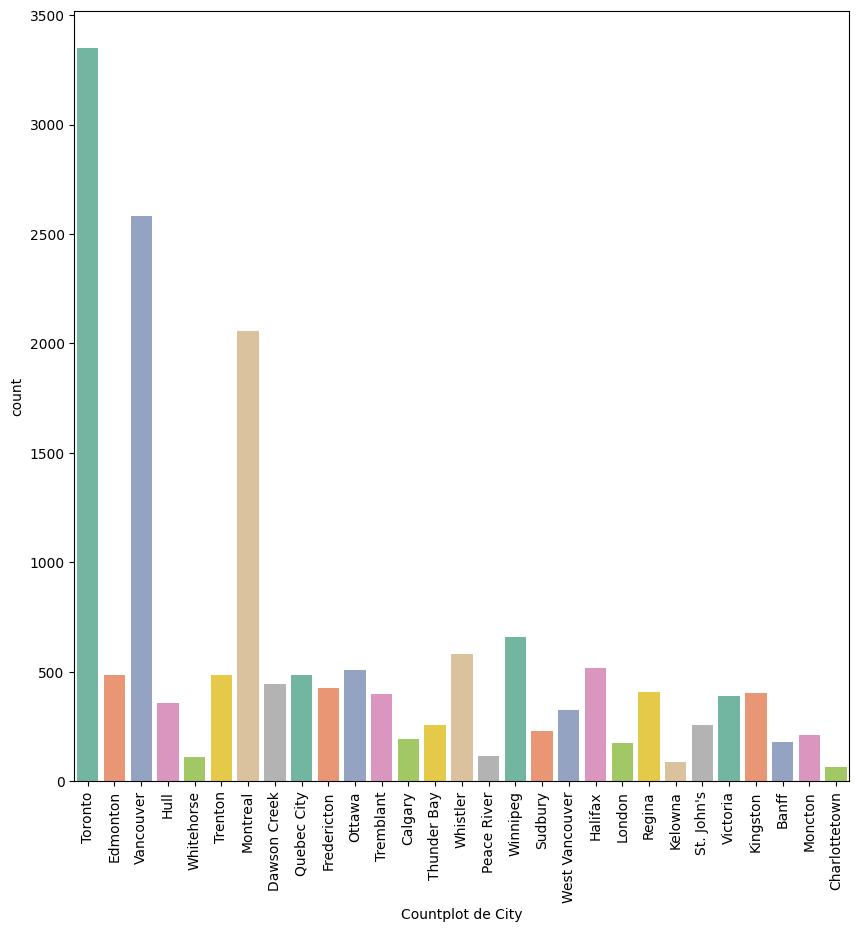

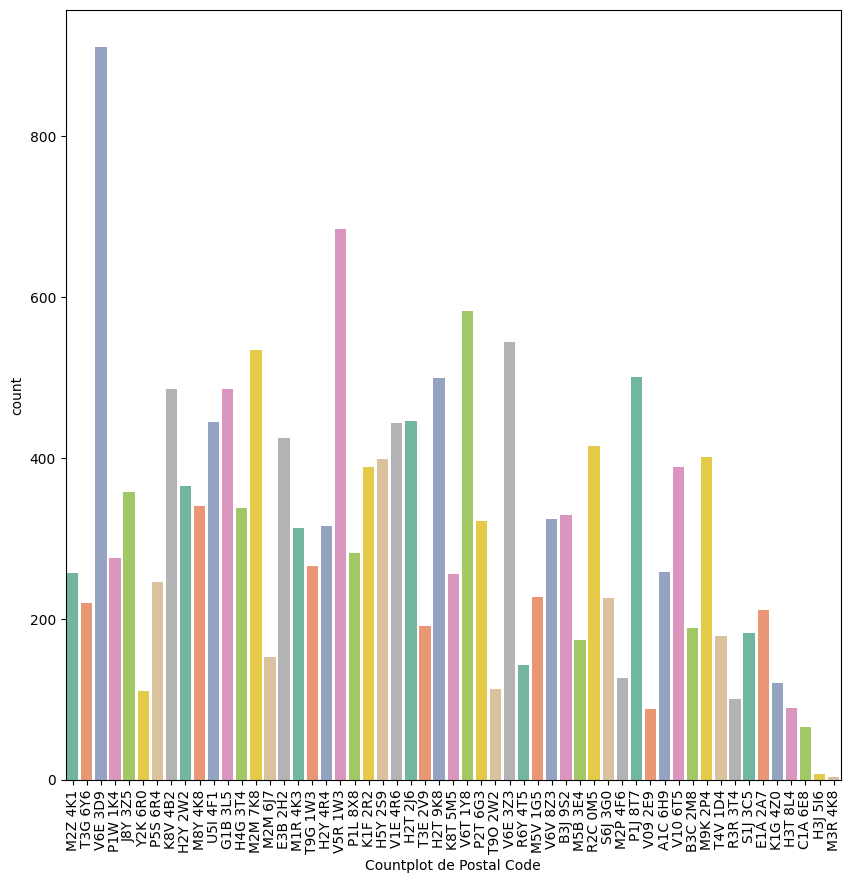

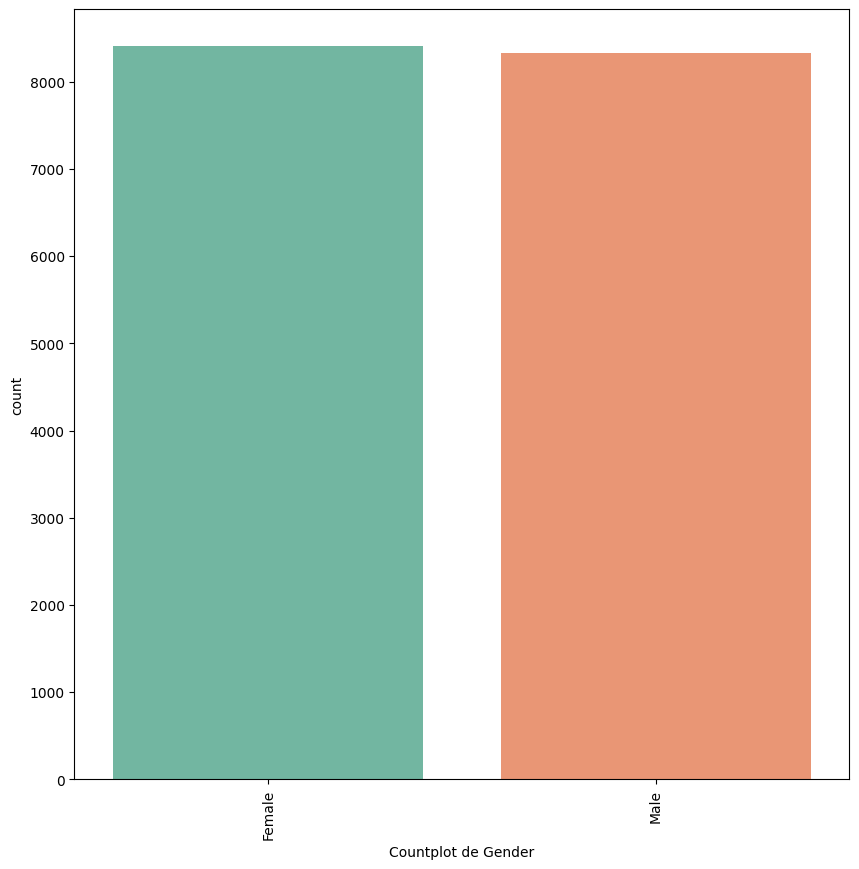

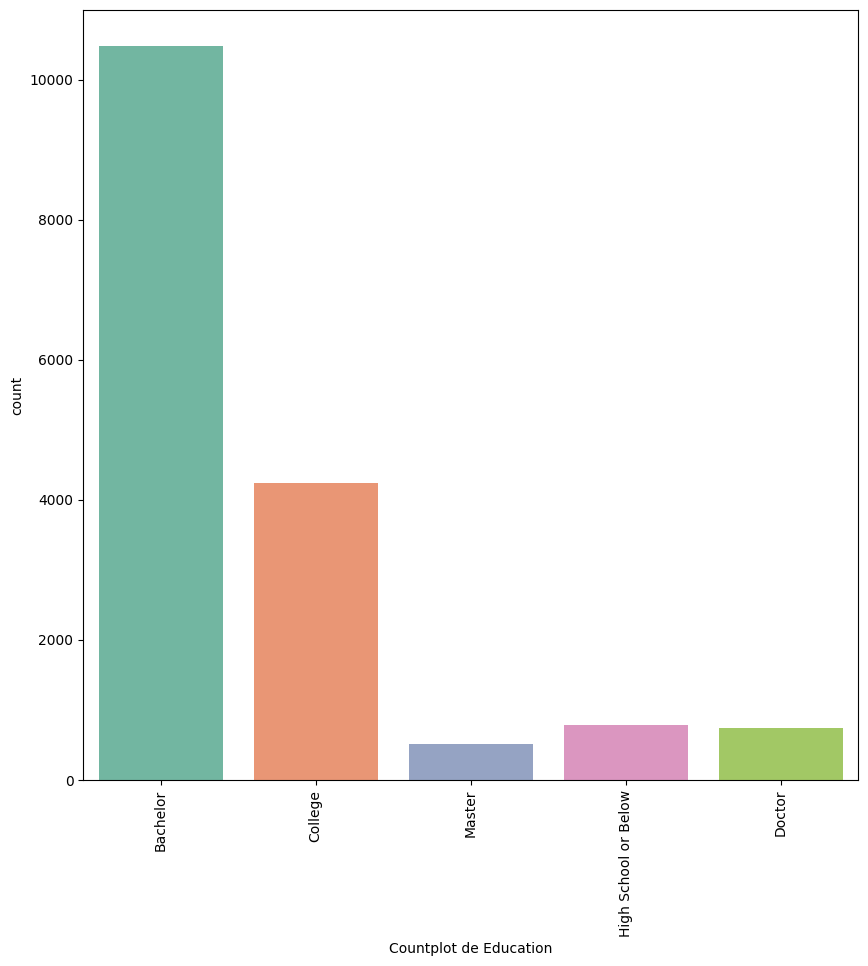

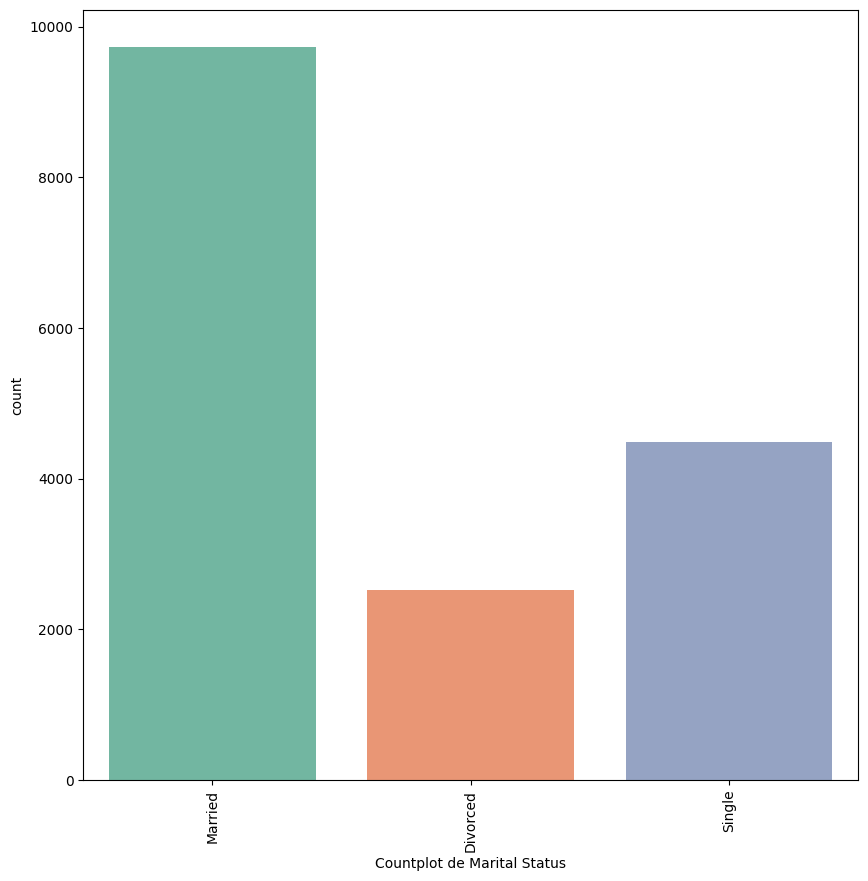

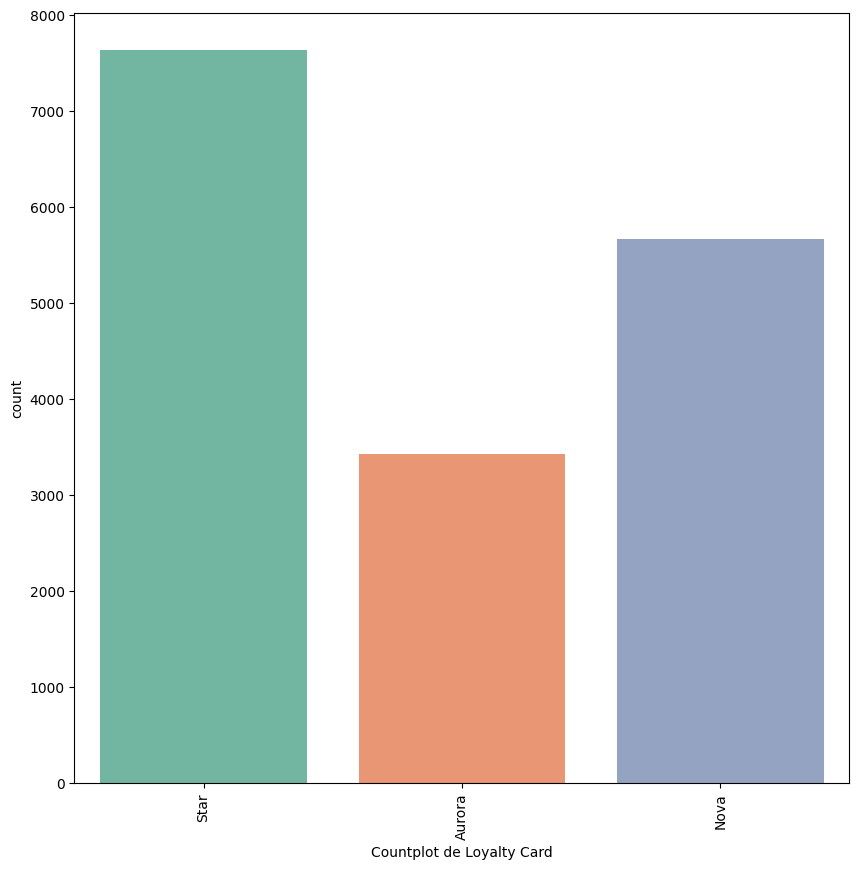

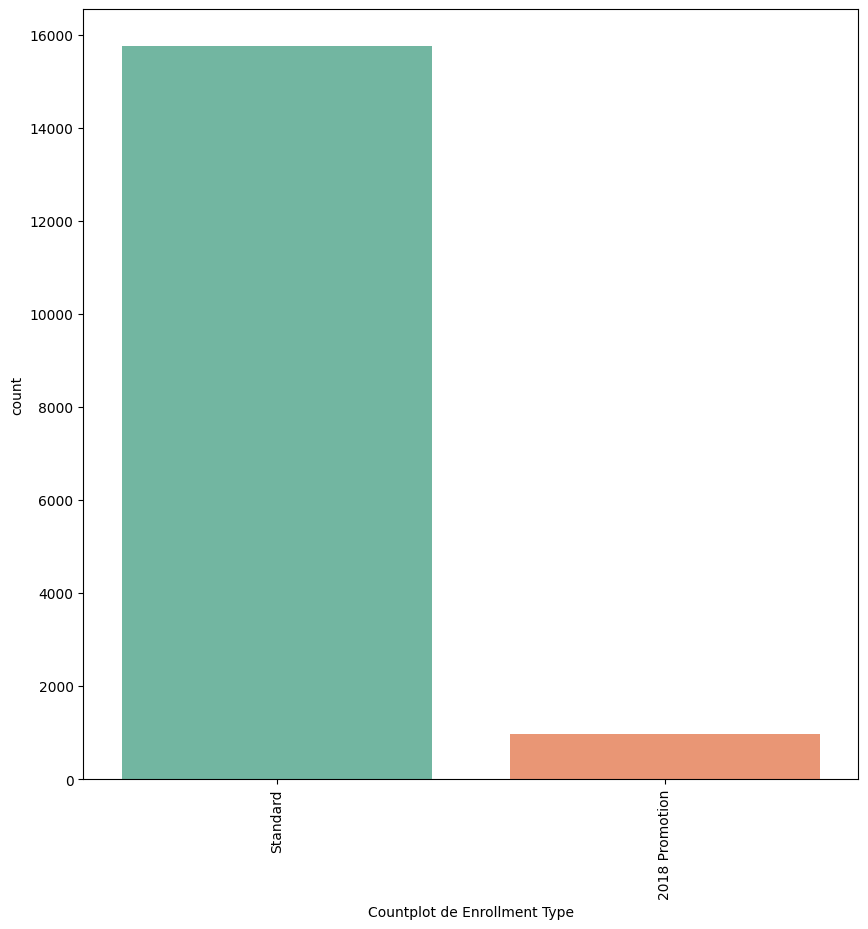

In [197]:
# Aplicamos nuestra función a nuestro segundo DataFrame
eda_basico(df_loyalty)

Ánalisis:

_COLUMNAS NUMÉRICAS_
- En `Salary` la media es de 79.245€. Hay valores negativos ya que el mínimo aparece que es -58.486€, lo cual puede indicar errores o que tenga deudas. Como esta segunda opción no la valoramos (sería raro que tengamos un cliente de estas características), tendremos que convertirlo a positivo. El valor máximo es muy alto... 407.228€. Puede ser un outlier, o por el contrario se trata de un error? Tenemos 4238 nulos que van a requerir de tratamiento, ya sea imputación (media, mediana, técnicas avanzadas...) o eliminación si no se va a usar.
- En `CLV` (el valor estimado de lo que el cliente aporta a la empresa) observamos que el valor medio es de 7.988€, pero tiene una desviación alta (std). Si observamos el valor máximo (83.325€), entendemos que hay clientes muy valiosos.
- En `Enrollment Year` vemos que de media, el año en el que más clientes llegaron al programa de lealtad fue 2015, la mayoría entre 2014 y 2017, siendo el valor máximo 2018, que entendemos que es el año en el que se está desarrollando el análisis.
- En `Cancellation Year` y  `Cancellation Month` tenemos muchos valores nulos, por lo que sus valores no son muy reales o descriptivos. Solo tenemos 2.067 registros de los 16737 que deberíamos tener, por lo que ya vemos que son columnas que también requerirán de tratamiento. También son columnas que están en tipo float. Si nos las quedamos, lo ideal sería pasarlas a integer.

_COLUMNAS CATEGÓRICAS_
- En `Country` observamos como único valor Canadá, ya que entendemos que es el país sobre el que se está desarrollando el análisis. En este ejercicio en concreto, podríamos valorar si la eliminamos ya que no nos aporta, pero podría ser que este ejercicio fuese una muestra sobre el total de la población, y por tanto hubiese que conservarla.
- En `Province` y `City` observamos que las que tienen mayor frecuencia son Ontario	y Toronto respectivamente, es decir, se correlaciona de forma correcta. Tiene sentido, ya que Toronto es la ciudad más poblada de Canadá.
- Sobre el perfil de cliente según `Gender`, `Education`, `Marital Status`, `Loyalty Card`, `Enrollment Type` vemos que lo más frecuente es que sean mujeres, con un nivel de estudios universitario, que están casadas, que su tarjeta de lealtad es "Star" y su tipo de inscripción al sistema de lealtad es "Standard".
- En las gráficas, en este caso como no tenemos valores nulos, no nos hará falta imputarlos, por lo que sobre todo nos sirven para hacernos una idea de cómo están distribuidos nuestros datos.

Unión de tablas:

No vamos a utilizar el método `concat` ya que este nos apilaría los datos. Estaría bien utilizarlo si por ejemplo queremos unir diferentes páginas con el mismo tipo de información, pero en este caso, queremos unir dos DataFrames con tipos de información completamente diferente, por lo que utilizaremos algún `merge` o `join`.

Para ello, primero vamos a observar si hay coincidencias en los nombres de columnas:

In [198]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [199]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

Genial! Tenemos coincidencia en la columna `Loyalty Number`, que será nuestro identificador único (o Primary Key, en SQL). Como es un identificador único que me interesa conservar, no realizaremos un `join`, ya que estaríamos convirtiendo esa columna en el índice. En su lugar, aplicaremos el método `merge`.

Como no sabemos con certeza qué información nos puede aparecer con coincidencias, para mantener la base de datos completa y detectar una posible incatividad, vamos a aplicar el método `how="outer"`, que lo que hará será devolvernos todo tipo de registros, haya o no coincidencias. Si no hay coincidencias, nos devolverá las columnas del DataFrame que estén vacías con ese campo como nulo (NaN).

En caso de que quisiéramos centrarnos únicamente en los clientes con actividad, podríamos usar un `inner`. Si, por el contrario, consideráramos uno de los CSV como nuestra base principal, usaríamos un `left` para conservar todos sus registros, incluso si en el CSV secundario algunos campos aparecen vacíos (los cuales se mostrarían como NaN).

In [200]:
df = df_loyalty.merge(df_activity, how = 'outer')

"""df_loyalty es como si fuese la columna del FROM en SQL, la que queda a la izquierda, y df_activity es la que unimos a la derecha
Como las columnas se llaman igual, no hace falta que apliquemos "left_on" y "right_on", que servirían para indicar que esa columna es la misma."""

In [201]:
df.sample(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
313914,793904,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,84396.0,Single,Nova,15656.03,Standard,2014,8,NaN,NaN,2018,7,4,4,8,4352,435.0,0,0
306135,776443,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Single,Aurora,30141.62,Standard,2012,11,NaN,NaN,2018,4,6,0,6,2154,322.5,0,0
65919,247721,Canada,Quebec,Tremblant,H5Y 2S9,Female,Doctor,210090.0,Divorced,Star,5096.67,Standard,2013,7,NaN,NaN,2018,4,0,0,0,0,0.0,0,0


In [202]:
# Comprobación de la forma
print(f"Este DataFrame ahora tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

Este DataFrame ahora tiene 405624 filas y 25 columnas.


### 2. _LIMPIEZA DE DATOS_
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

Vamos a realizar la **conversión de datos y limpieza** correspondiente, según hemos ido declarando en la fase de EDA.

In [203]:
# Función que limpia símbolos no numéricos, normaliza decimales y convierte la columna a tipo float.
def limpieza_conversion_float(df, columnas):
    for col in columnas:
        df[col] = (df[col].astype(str).str.replace(r"[^0-9,\.]", "", regex=True).str.replace(",", ".", regex=False).astype(float))
    return df

"""Con esta función los pasos que estoy dando son:
    - Declarar que mi función tiene que venir acompañada de dos argumentos: un DataFrame ("df") y una lista de las columnas ("columnas") sobre las que lo quiero aplicar. 
    Cuando pase las "columnas", si son varias, tengo que hacer una lista donde iran todas metidas, ya que la función solo reconocerá una lista.
    - Hago un for para que recorra lo que contenga esa lista.
    - A mi df en las columnas "col" (las que estás recorriendo), aplica lo siguiente:
        - Vuelvo a decirle -a mi DF en las columnas "col"-, conviertelas en string, reemplaza los valores que no sean números, comas o puntos (y como aplico regex, 
        le indico que es True), cambia si hay comas por puntos para estandarizar con valores tipo float (aquí no aplico regex, por lo que es False), y finalmente conviertelas
        a tipo float.
"""

'Con esta función los pasos que estoy dando son:\n    - Declarar que mi función tiene que venir acompañada de dos argumentos: un DataFrame ("df") y una lista de las columnas ("columnas") sobre las que lo quiero aplicar. \n    Cuando pase las "columnas", si son varias, tengo que hacer una lista donde iran todas metidas, ya que la función solo reconocerá una lista.\n    - Hago un for para que recorra lo que contenga esa lista.\n    - A mi df en las columnas "col" (las que estás recorriendo), aplica lo siguiente:\n        - Vuelvo a decirle -a mi DF en las columnas "col"-, conviertelas en string, reemplaza los valores que no sean números, comas o puntos (y como aplico regex, \n        le indico que es True), cambia si hay comas por puntos para estandarizar con valores tipo float (aquí no aplico regex, por lo que es False), y finalmente conviertelas\n        a tipo float.\n'

In [204]:
columnas_float = ["Points Redeemed", "Dollar Cost Points Redeemed"]
limpieza_conversion_float(df, columnas_float)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0.0,0.0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0.0,0.0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385.0,31.0
3,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,4,4,0,4,924,92.0,0.0,0.0
4,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,5,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,7,15,0,15,1995,199.0,0.0,0.0
405620,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,9,0,0,0,0,0.0,0.0,0.0
405621,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,10,6,0,6,708,70.0,0.0,0.0
405622,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,11,11,4,15,2040,204.0,0.0,0.0


In [205]:
# Comprobación
df[columnas_float].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Points Redeemed              405624 non-null  float64
 1   Dollar Cost Points Redeemed  405624 non-null  float64
dtypes: float64(2)
memory usage: 6.2 MB


Ahora vamos a observar los duplicados, ya que observamos que tenemos 1864 filas duplicadas.

In [206]:
# Contamos el número de duplicados en total
print(f"Tienes {df.duplicated().sum()} filas duplicadas.")

Tienes 1864 filas duplicadas.


In [207]:
# Exploración de duplicados
df[df.duplicated(keep=False)].head(10) # añadimos el keep=False para que nos muestre columna original vs. columna duplicada

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
984,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,1,0,0,0,0,0.0,0.0,0.0
985,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,1,0,0,0,0,0.0,0.0,0.0
987,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,2,0,0,0,0,0.0,0.0,0.0
988,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,2,0,0,0,0,0.0,0.0,0.0
989,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,3,0,0,0,0,0.0,0.0,0.0
990,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,3,0,0,0,0,0.0,0.0,0.0
997,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,7,0,0,0,0,0.0,0.0,0.0
998,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,7,0,0,0,0,0.0,0.0,0.0
1008,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,12,0,0,0,0,0.0,0.0,0.0
1009,101902,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN,2017,12,0,0,0,0,0.0,0.0,0.0


Observamos que los duplicados son exactamente el mismo dato, por lo que intuimos que se trata de un error de introducción de datos y decidimos eliminarlos.

In [208]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Comprobamos
print(f"Ahora tu Dataframe tiene {df.duplicated().sum()} duplicados.")

Ahora tu Dataframe tiene 0 duplicados.


En su momento en el Describe, observamos que en `Salary` hay al menos un valor en negativo, ya que su mínimo aparecía en negativo, por lo que vamos a pasarlo a positivo.

In [209]:
# Convertir valores negativos en positivos
df['Salary'] = df['Salary'].abs() # Tengo que primeramente llamar a la columna de mi df para aplicar el cambio y que se guarde

Como aún no sabemos que vamos a hacer con `Cancellation Year` y `Cancellation Month`, las vamos a pasar a Int64, que es el tipo de integer que acepta valores nulos.

In [210]:
# Función que limpia símbolos no numéricos, normaliza decimales y convierte la columna a tipo Int64.

def limpieza_conversion_int64(df, columnas):
    for col in columnas:
        df[col] = (df[col].astype("Int64"))
    return df


In [211]:
columnas_int64 = ["Cancellation Year", "Cancellation Month"]
limpieza_conversion_int64(df, columnas_int64)
df.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
305592,775158,Canada,Nova Scotia,Halifax,B3J 9S2,Male,Bachelor,48868.0,Divorced,Star,7179.23,Standard,2018,7,<NA>,<NA>,2017,1,0,0,0,0,0.0,0.0,0.0
228861,607489,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,57464.0,Married,Star,2787.54,Standard,2017,2,<NA>,<NA>,2018,10,3,0,3,1224,122.0,0.0,0.0
281778,724378,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,53465.0,Single,Nova,4170.69,Standard,2014,12,<NA>,<NA>,2018,7,17,0,17,4029,402.0,0.0,0.0
183089,505988,Canada,Ontario,Thunder Bay,K8T 5M5,Male,High School or Below,54033.0,Single,Star,12298.69,Standard,2018,11,<NA>,<NA>,2018,6,11,3,14,3584,358.0,0.0,0.0
264210,685375,Canada,British Columbia,Vancouver,V6E 3Z3,Male,College,NaN,Married,Star,18542.30,Standard,2016,7,<NA>,<NA>,2018,7,16,0,16,1120,112.0,0.0,0.0


Hasta aquí, ya hemos realizado la verificación de la consistencia informativa, y la corrección de los datos para asegurarnos de que los datos se presentan de forma coherente.

También hemos realizado ajustes y conversiones necesarias en las columnas para garantizar la adecuación de los datos.

Por último, en cuanto a limpieza, quizá sería mejor, para evitar posibles errores y agilizar la escritura, que las columnas estén escritas en minúsculas y sin espacios. Vamos con ello.

In [212]:
# Pasamos el nombre de las columnas a minúscula
df.columns=df.columns.str.lower().str.replace(' ','_',)
df.head(3)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,<NA>,<NA>,2017,1,3,0,3,1521,152.0,0.0,0.0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,<NA>,<NA>,2017,2,2,2,4,1320,132.0,0.0,0.0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,<NA>,<NA>,2018,10,6,4,10,3110,311.0,385.0,31.0


Vamos a pasar con la **gestión de nulos**. Volvemos a la exploración, pero ahora de forma más exhaustiva.

In [213]:
# Valoración de columnas numéricas con nulos
numericas_con_nulos = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').isnull().any()]
print(f"Las columnas numéricas con nulos son: {list(numericas_con_nulos)}")

Las columnas numéricas con nulos son: ['salary', 'cancellation_year', 'cancellation_month']


In [214]:
# Y las de tipo categórico
categoricas_con_nulos = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]
print(f"Las columnas categóricas con nulos son: {list(categoricas_con_nulos)}")

Las columnas categóricas con nulos son: []


Observamos que no tenemos columnas categóricas con nulos, únicamente 3 numéricas. Vamos a ver ahora los porcentajes.

In [215]:
# Veamos por columna el porcentaje en el que aparece cada valor
for col in numericas_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # convertimos a porcentaje
    print("........................")
# dropna=False no excluye los nan en el conteo
# normalize sirve para que me de el porcentaje por columna, pero está en formato decimal, así que multiplicamos por 100

La distribución de las categorías (incluyendo nulos) para la columna salary


salary
NaN         25.326927
101933.0     0.136715
61809.0      0.083218
51573.0      0.083218
62283.0      0.083218
              ...    
61936.0      0.005944
53119.0      0.005944
77060.0      0.005944
86726.0      0.005944
69756.0      0.005944
Name: proportion, Length: 5891, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna cancellation_year


cancellation_year
<NA>    87.703091
2018      3.84362
2017      3.00847
2016     2.538141
2015     1.575193
2014     1.075887
2013     0.255597
Name: proportion, dtype: Float64

........................
La distribución de las categorías (incluyendo nulos) para la columna cancellation_month


cancellation_month
<NA>    87.703091
12       1.266099
11       1.261888
8        1.236378
7         1.10957
10       1.070438
9        1.046166
6        0.980781
1        0.923073
3        0.886418
5        0.881464
2        0.826233
4        0.808401
Name: proportion, dtype: Float64

........................


Y ahora en un DataFrame:

In [216]:
# Identificamos el porcentaje de nulos en un DF para poder llamarlo siempre que quiera

# 1. Calculamos el porcentaje
# df.isnull().sum() cuenta cuántos nulos hay por columna
# df.shape[0] nos da el número total de filas (para calcular el porcentaje)
# Multiplicamos por 100 para obtener el porcentaje
porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100

# 2. Añadimos el total del sumatorio de nulos
total_nulos = df.isnull().sum()

# 3. Convertimos la serie en un DataFrame con una columna llamada "Porcentaje nulos" 
df_nulos = pd.DataFrame({
    "Total nulos": total_nulos,
    "Porcentaje nulos": porcentaje_nulos,
    "Tipo de dato": df.dtypes})

# 4. Añadimos el tipo de dato de cada columna
df_nulos["Tipo de dato"] = df.dtypes

# 5. Filtramos solo las columnas que tienen al menos un nulo (> 0%), redondeamos, ordenamos y ponemos reset_index() para que nos salga en formato DataFrame
df_nulos = df_nulos[df_nulos["Porcentaje nulos"] > 0].round(2).reset_index().sort_values(by="Porcentaje nulos", ascending=False)

# 6. Renombramos las columnas para que el resultado sea claro
df_nulos.columns = ["Columna", "Total nulos", "Porcentaje nulos", "Tipo de dato"]

# 7. Llamamos al DataFrame para comprobar
df_nulos

,Columna,Total nulos,Porcentaje nulos,Tipo de dato
1,cancellation_year,354110,87.70,Int64
2,cancellation_month,354110,87.70,Int64
0,salary,102260,25.33,float64


Vamos a revisar todo con una función:

In [218]:
def imputar_numericos(df):
    num_cols = df.select_dtypes(include=np.number).columns

    # Calcular % de nulos por columna
    pct_nulls = (df[num_cols].isnull().sum() / len(df)) * 100

    for col in num_cols:
        porcentaje = pct_nulls[col]

        # Sin nulos
        if porcentaje == 0:
            print(f"{col}: sin valores nulos.")
            print("---------------------------------------------------------")
            continue

        # Caso 1: entre 0% y 20%: imputar con mediana
        elif porcentaje <= 20:
            mediana = df[col].median()
            df[col] = df[col].fillna(mediana)
            print(f"{col}: {porcentaje:.2f}% de nulos. Imputada con la mediana ({mediana:.2f}).")
            print("---------------------------------------------------------")

        # Caso 2: más del 20%: advertencia
        else:
            print(f"{col}:⚠️ ALTO PORCENTAJE DE NULOS. Hay un {col}: {porcentaje:.2f}% de nulos. Se recomienda revisar esta columna e imputar con técnicas avanzadas, o considerar su eliminación.")
            print("---------------------------------------------------------")

    return

In [219]:
imputar_numericos(df)

loyalty_number: sin valores nulos.
---------------------------------------------------------
salary:⚠️ ALTO PORCENTAJE DE NULOS. Hay un salary: 25.33% de nulos. Se recomienda revisar esta columna e imputar con técnicas avanzadas, o considerar su eliminación.
---------------------------------------------------------
clv: sin valores nulos.
---------------------------------------------------------
enrollment_year: sin valores nulos.
---------------------------------------------------------
enrollment_month: sin valores nulos.
---------------------------------------------------------
cancellation_year:⚠️ ALTO PORCENTAJE DE NULOS. Hay un cancellation_year: 87.70% de nulos. Se recomienda revisar esta columna e imputar con técnicas avanzadas, o considerar su eliminación.
---------------------------------------------------------
cancellation_month:⚠️ ALTO PORCENTAJE DE NULOS. Hay un cancellation_month: 87.70% de nulos. Se recomienda revisar esta columna e imputar con técnicas avanzadas, o con

Análisis:
- Como ya preveíamos, las columnas `cancellation_year` y `cancellation_month` tienen más de un 85% de nulos, un resultado imposible para sacar ningún tipo de información de estas columnas. Si imputasemos por media, mediana o técnicas avanzadas como KNN o Iterative Imputer, corremos el riesgo de dar información que no sería muy verosímil a lo real, por lo que lo mejor es eliminarlas.
- En `salary` es un 25% de nulos, por lo que podemos considerar que ya es un alto porcentaje y que debemos aplicar alguna de estas técnicas avanzadas. En este caso, creemos que la técnica de Iterative Imputer puede ser más precisa, ya que estamos trabajando con un DataFrame con muchos registros. Además, como en `salary` pueden existir muchas relaciones entre columnas, pensamos que puede ser más preciso.

In [220]:
# Creamos una función para eliminar columnas
def eliminar_columnas(df, columnas):
    df.drop(columnas, axis=1, inplace=True)

In [221]:
eliminar_columnas(df, ["cancellation_year", "cancellation_month"])

In [222]:
# Comprobación
df.sample(3)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
18039,139682,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,50847.0,Married,Star,5442.74,Standard,2012,5,2018,4,0,0,0,0,0.00,0.0,0.0
1719,103502,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,66226.0,Married,Star,2580.85,Standard,2017,5,2018,4,5,3,8,1864,200.88,0.0,0.0
398330,982535,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,53310.0,Married,Star,2545.52,Standard,2015,10,2017,3,0,0,0,0,0.00,0.0,0.0


In [223]:
total_college = df[df['education'] == 'College'].shape[0] 
unknown_college = df[(df['education'] == 'College') & (df['salary'].isna())] 
porcentaje_unknown = len(unknown_college) / total_college * 100 
print(f"Porcentaje de College con salario desconocido: {porcentaje_unknown} %")

Porcentaje de College con salario desconocido: 100.0 %


In [224]:
len(unknown_college)

102260

In [225]:
# Usamos la técnica de Iterative Imputer para la columna "salary"
imputer_iter = IterativeImputer(max_iter = 1000, random_state = 42)
df['salary'] = imputer_iter.fit_transform(df[['salary']])

In [226]:
# Comprobamos
print(f"La columna {df.columns.values[7]} ahora tiene {df['salary'].isnull().sum()} valores nulos.")

La columna salary ahora tiene 0 valores nulos.


Guardamos nuestro DataFrame ya limpio y tratado en un CSV para pasar a la Fase 2.

In [227]:
df.to_csv('datasky_clean.csv', index=False)
print("Su CSV se ha creado con éxito.")

Su CSV se ha creado con éxito.


Hemos guardado nuestro CSV con toda la información limpia, pero hay columnas que bajo nuestro punto de vista y para este caso en concreto, pensamos que no aportarían información. Por ejemplo:
- `country`es una columna, que en este caso concreto, como comentabamos no aporta mucha información, por lo que la podríamos eliminar
- `postal_code` también es una columna que, según vemos en las preguntas de visualización, no vamos a utilizar en ningún caso

En el resto de columnas, creemos que puede ser información relevante en algún caso, así las vamos a mantener.

In [228]:
# Eliminamos columnas con información irrelevante
eliminar_columnas(df, ["country", "postal_code"])